# Visualizing the Relationship between Features in Iris Dataset 

#### <font color="deeppink">Note:</font>  
Python code within these Jupyter Notebooks should not be subjected to the scrutiny of ...  
* Use of code modularization with functions  
* Use of Error Handling  
* Use of correct variable/function names  

These code cells are for the exploration/experimentation of new python features I did not work with before.  
*While the final script at end of each stage should be subjected to this scrutiny*

In previous notebook [Visualizing Distributions](visualizing_distributions.ipynb), we visually explored the distribution of data values of each feature in the Irs dataset with the use of histograms and boxplots.   
 We will now explore any possible linear (or non-linear) correlation between the Iris dataset's  4 features further with the use of :  
 * Scatter plots  

The use of Matplotlib module for generating Scatter plots is explored in this [notebook](exploring_matplotlib_scatterplots.ipynb)   

https://en.wikipedia.org/wiki/Scatter_plot  
https://www.w3schools.com/python/matplotlib_scatter.asp   
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter 



The advantages of scatter plots include :
* Visualize relationships and make subjective judgments
* Identify trends not obvious with mathematical analysis alone
* Analyze data where we have no assumptions about the data

***
### Generating Scatter plots of Iris Features  

> While this Matplotlib code was guided by numerous ChatGPT queries ... **80% - 90% is my code in the end**

Use a Scatter Plot to compare any pair of Iris features</br>
[0] sepal length (cm)  
[1] sepal width (cm)  
[2] petal length (cm)  
[3] petal width (cm)  
  
   

Load modules and prep dataset ...

In [1]:
#import usual required modules 
import pandas as pd
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt

#load local cvs file located in .\resources\iris.data
df_iris = pd.read_csv("../resources/iris.csv")


Lets compare **Sepal Width/Length** with default Scatter plot ...

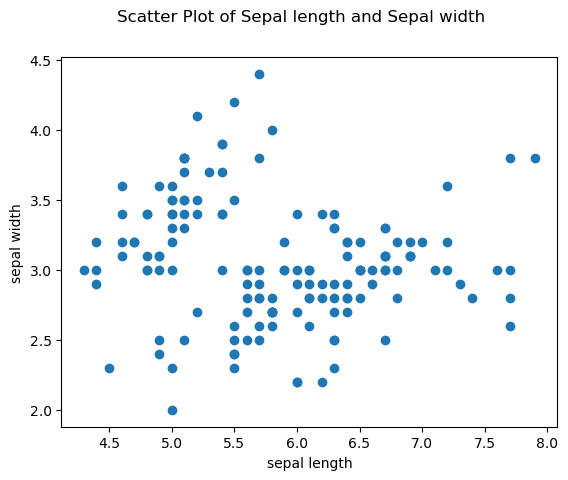

In [3]:
fig, ax = plt.subplots()  # 'fig' is the figure, 'ax' is the axes

#plot scatter plot
ax.scatter(df_iris["sepal.length"], df_iris["sepal.width"])

#labels
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

fig.suptitle("Scatter Plot of Sepal length and Sepal width")
plt.show()

There seems to be localized data clustering ...   
Lets use color to differentiate data from the 3 Iris Species : Setosa, Versicolor, and Virginica  ...

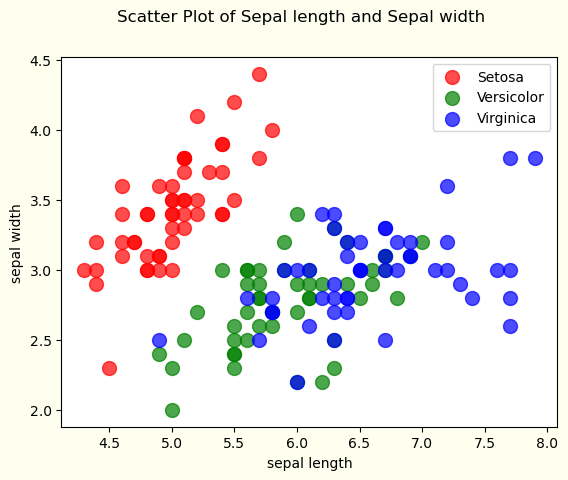

In [4]:
# Define the colors for the species
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}  # Color for Setosa, Versicolor, and Virginica
iris_species = ['Setosa', 'Versicolor', 'Virginica']

fig, ax = plt.subplots(facecolor = 'ivory')  # 'fig' is the figure, 'ax' is the axes

for ispecies in iris_species:
    ax.scatter(df_iris[df_iris['variety'] == ispecies]["sepal.length"],  # Filter Sepal length data by species(x-axis)
                df_iris[df_iris['variety'] == ispecies]["sepal.width"],  # Filter Sepal width data by species(y-axis)
                color=colors[ispecies],  # Color for the species
                label=ispecies,  # Label for the species
                alpha=0.7,  # Set transparency
                marker = 'o',  # large marker
                s=100)  # Size of the points

#labels
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.legend()

fig.suptitle("Scatter Plot of Sepal length and Sepal width")
plt.show()

### **Extra Challenge** : Scatter Plot and Histograms   
Lets try adding Histogram to X and Y axis (with color differentiated by species)

Text(0.5, 0.98, 'Scatter plots and Histograms\n of sepal length and sepal length features')

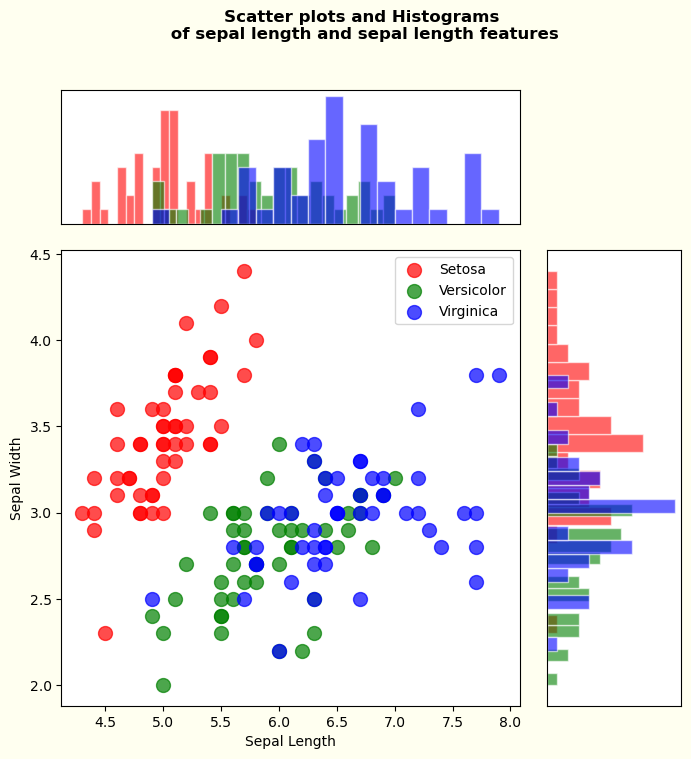

In [ ]:
#need the gridspec module
import matplotlib.gridspec as gridspec

# Define the colors for the species
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}  # Color for Setosa, Versicolor, and Virginica
iris_species = ['Setosa', 'Versicolor', 'Virginica']

# Set up the layout 
fig = plt.figure(figsize=(8, 8), facecolor = 'ivory')
gs = gridspec.GridSpec(4, 4)

#Setup Axes that will merge across the 4x4 grid
ax_scatter = plt.subplot(gs[1:4, 0:3])  # Plot spans x grid 1-4 and y grid 0-3 for a 3x3 spanned plot
ax_xhist = plt.subplot(gs[0, 0:3], sharex=ax_scatter)  # Histogram spans Columns 0-3 at row #0
ax_yhist = plt.subplot(gs[1:4, 3], sharey=ax_scatter)  # Histogram spans Rows 1-4 at Column #3

for ispecies in iris_species:
    #Add Scatterplot
    ax_scatter.scatter(df_iris[df_iris['variety'] == ispecies]["sepal.length"],  # Filter Sepal length data by species(x-axis)
                df_iris[df_iris['variety'] == ispecies]["sepal.width"],  # Filter Sepal width data by species(y-axis)
                c=colors[ispecies],  # Color for the species
                label=ispecies,  # Label for the species
                alpha=0.7,  # Set transparency
                marker = 'o',  # large marker
                s=100)  # Size of the points
    ax_scatter.set_xlabel("Sepal Length")
    ax_scatter.set_ylabel("Sepal Width")
    ax_scatter.legend()

    # Histograms
    ax_xhist.hist(df_iris[df_iris['variety'] == ispecies]["sepal.length"], bins=20, color=colors[ispecies],edgecolor = 'white', alpha=0.6)
    ax_yhist.hist(df_iris[df_iris['variety'] == ispecies]["sepal.width"], bins=20, orientation='horizontal', color=colors[ispecies],edgecolor = 'white', alpha=0.6)
    
    # Remove ticks and labels from histograms... Messy!
    ax_xhist.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
                        left=False, right=False, labelleft=False)
    ax_yhist.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
                        left=False, right=False, labelleft=False)
    
fig.suptitle("Scatter plots and Histograms\n of sepal length and sepal length features", fontweight="bold")


A bit cluttered ... but Nice ! 😊

***
### Try plot all combinations of Features for the Iris dataset in a 4 x 4 Grid

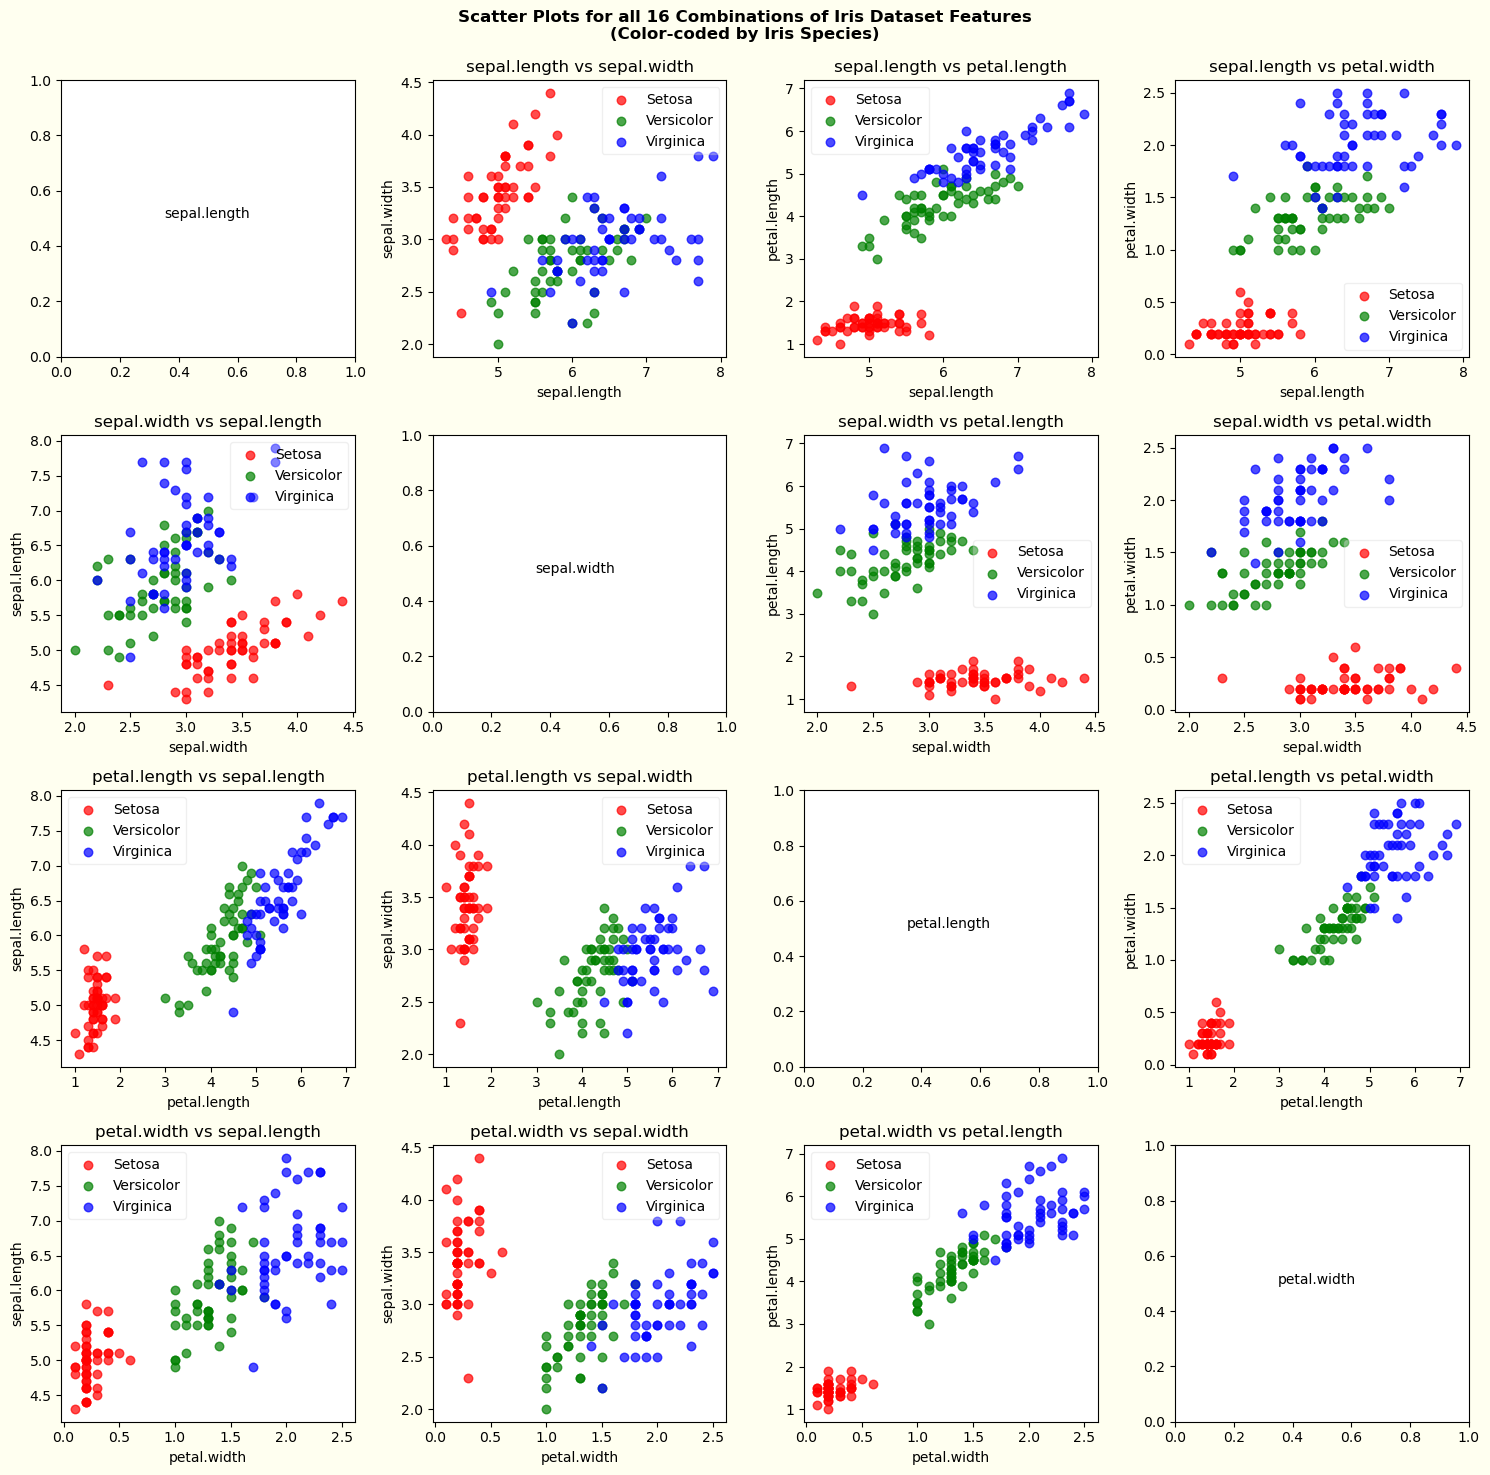

In [ ]:
# Define the data for the 3 species
colors = ['red', 'green', 'blue']  # Color for Setosa, Versicolor, and Virginica
ispecies = ['Setosa', 'Versicolor','Virginica']

# Set up a 4x4 grid for 16 Feature combinations
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), facecolor = 'ivory')


feature_names = df_iris.columns
# Loop through each pair of features and plot them
for i in range(4):
    for j in range(4):
        ax = axes[i, j] #select specific axis for plot within 4x4 grid
        if i == j:
            # (similar feature names) ... Just print feature name
            ax.text(0.35, 0.5, feature_names[i])
        else:
            # (different feature pairs) ... plot a scatter plot
            for species in range(3):
                ax.scatter(df_iris[df_iris['variety'] == ispecies[species]][feature_names[i]],  # feature i (x-axis)
                df_iris[df_iris['variety'] == ispecies[species]][feature_names[j]],  # feature j (y-axis)
                color=colors[species],  # Color for the species
                label=ispecies[species],  # Label for the species
                alpha=0.7,  # Set transparency
                marker = '.',  # dot
                s=150)  # Size of the points
            ax.set_xlabel(feature_names[i])
            ax.set_ylabel(feature_names[j])
            ax.set_title(f'{feature_names[i].replace('(cm)', '')} vs {feature_names[j].replace('(cm)', '')}') #remove unnecessary "(cm)" from feature names in Title
            ax.legend(framealpha=0.3) #note how legend is moved around to avoid overlaying on data markers ... give it an alpha setting

fig.suptitle("Scatter Plots for all 16 Combinations of Iris Dataset Features\n(Color-coded by Iris Species)\n", x = 0.5, fontweight = "bold")
plt.tight_layout()
plt.show()

***

Things are getting borderline cluttered ... But lets try to display both Scatterplots and Histograms for all 16 Iris feature combinations    
In the final [python script (for this stage)](../code/Relationship_analysis.py), we will look at plotting Scatterplots and Histograms for all feature combinations   

While this final plot may get quite cluttered ... *this is really a coding task in managing a large matrix of data and generating required visualizations*  
* Plotting tasks must be broken down into a series of manageable sub-tasks (functions)  
* Iterating thru Data must be carefully managed (splicing/filtering data and how data subsets are passed around to each script function)
* Manage full grid of 4x4 plots that are each a 4x4 grid layout (i.e. managing a 16x16 grid matrix)

***
# Conclusion

In this exploration of Iris scatter plots, we noted a relationship between the different features of the Iris Flower dataset.  
By subjective visual assessment of the generated plots, we can distinguish the three species of this flower.

In particular ...
1. **Sepal Length and Width**  
While there is a degree of overlap between Versicolor and Virginica species, there is a clear separation of the Sotosa species.  
There a a clear linear relationship for the Sotosa species that is not so obvious for other 2 species.   
This feature pair is good at distinguishing the Sotosa species
2. **Petal Length and Width**
The overlap between Versicolor and Virginica species is not as pronounced as Sepal width/length.  
There appears to be a stronger linear correlation between this feature pair for Versicolor and Virginica species.   
Again, Sotosa data is clearly separated from the other two species, but shows a weaker linear relationship.  
3. **Sepal vs. Petal Features**  
Plotting sepal measurements against petal measurements is a mixed bag.  
The features of petal/sepal length show strong linear correlation for all 3 species and clear separation of species.  
The features of petal/sepal width show weak linear correlation for Versicolor and Virginica species, linearity for Sotasa species remains strong.  
Mixing the features of petal/sepal length/width again shows weak linear correlation for Versicolor and Virginica species, linearity for Sotasa species remains  


Making visual judgments on the scatter plots of various Iris feature pairs, reveal ...
* Clear separations between the three species  
* Clear linear relationship exists between [Petal Length/Width] and [Petal/Sepal length] feature pairs.  

The next stage of analysis will quantify these subjective judgments into numerical values

